# Heart Disease  Prediction using Machine Learnin
Prediction and diagnosis of heart disease is the biggest challenge in the medical industry and depends on factors such as physical examination and patient signs and symptoms.

Factors affecting heart disease are cholesterol levels in the body, smoking and obesity habits, family history of diseases, blood pressure, and work environment. Machine learning algorithms play an essential and accurate role in predicting heart disease.

Advancements in technology allow machine language to integrate with big data tools to manage unstructured and exponentially growing data. Heart disease is seen as the world's most debilitating disease in a person's life. In particular, in this type of disease, the heart is unable to push the required amount of blood to the remaining body organs to perform regular functions.

Heart disease can be predicted based on various symptoms such as age, gender, heart rate, etc. and reduces the death rate of heart patients.

Due to the increasing use of technology and data collection, we can now predict heart disease using machine learning algorithms. Let's now go further with the task of predicting heart disease using machine learning using

**Please note that my project draws inspiration from 'Machine Learning through Examples' by Dr. Alaa Tuaima, as I explore the concepts and techniques outlined in the book to create innovative solutions.**  . Python.g

#### Importing libraries and loading the dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math
%matplotlib inline
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

In [2]:
df = pd.read_csv('heart.csv')

new_column_names = {
    'age': 'Age',
    'sex': 'Gender',
    'cp': 'ChestPainType',
    'trestbps': 'RestingBloodPressure',
    'chol': 'Cholesterol',
    'fbs': 'FastingBloodSugar',
    'restecg': 'RestingECG',
    'thalach': 'MaxHeartRate',
    'exang': 'ExerciseInducedAngina',
    'oldpeak': 'STDepression',
    'slope': 'Slope',
    'ca': 'NumMajorVessels',
    'thal': 'Thalassemia',
    'target': 'HeartDisease'
}

df.rename(columns=new_column_names, inplace=True)

df.head()

,Age,Gender,ChestPainType,RestingBloodPressure,Cholesterol,FastingBloodSugar,RestingECG,MaxHeartRate,ExerciseInducedAngina,STDepression,Slope,NumMajorVessels,Thalassemia,HeartDisease
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### Doing analytics and understanding the data

In [3]:
df['NumMajorVessels'].value_counts()

NumMajorVessels
0    175
1     65
2     38
3     20
4      5
Name: count, dtype: int64

In [4]:
df['Slope'].value_counts()

Slope
2    142
1    140
0     21
Name: count, dtype: int64

In [5]:
df.shape

(303, 14)

In [6]:
df.isna().sum()

Age                      0
Gender                   0
ChestPainType            0
RestingBloodPressure     0
Cholesterol              0
FastingBloodSugar        0
RestingECG               0
MaxHeartRate             0
ExerciseInducedAngina    0
STDepression             0
Slope                    0
NumMajorVessels          0
Thalassemia              0
HeartDisease             0
dtype: int64

In [7]:
pd.set_option("display.float", "{:.2f}".format)  # sets a display option to indicates that floating-point numbers should be displayed with 2 decimal places.
df.describe()

,Age,Gender,ChestPainType,RestingBloodPressure,Cholesterol,FastingBloodSugar,RestingECG,MaxHeartRate,ExerciseInducedAngina,STDepression,Slope,NumMajorVessels,Thalassemia,HeartDisease
count,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00
mean,54.37,0.68,0.97,131.62,246.26,0.15,0.53,149.65,0.33,1.04,1.40,0.73,2.31,0.54
std,9.08,0.47,1.03,17.54,51.83,0.36,0.53,22.91,0.47,1.16,0.62,1.02,0.61,0.50
min,29.00,0.00,0.00,94.00,126.00,0.00,0.00,71.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,47.50,0.00,0.00,120.00,211.00,0.00,0.00,133.50,0.00,0.00,1.00,0.00,2.00,0.00
50%,55.00,1.00,1.00,130.00,240.00,0.00,1.00,153.00,0.00,0.80,1.00,0.00,2.00,1.00
75%,61.00,1.00,2.00,140.00,274.50,0.00,1.00,166.00,1.00,1.60,2.00,1.00,3.00,1.00
max,77.00,1.00,3.00,200.00,564.00,1.00,2.00,202.00,1.00,6.20,2.00,4.00,3.00,1.00


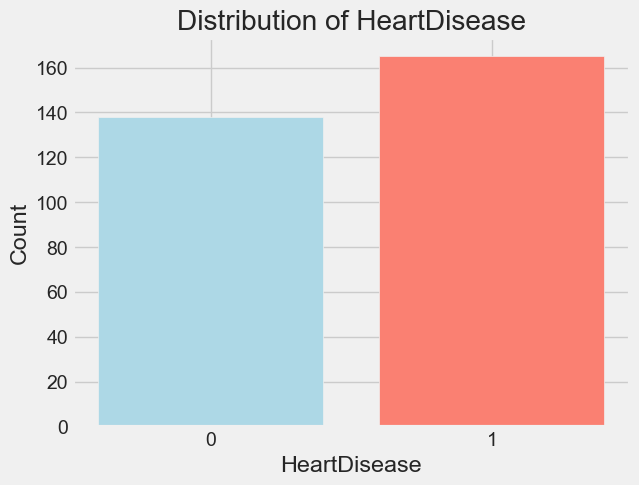

In [8]:
count_heartDiseas = df['HeartDisease'].value_counts()
plt.bar(count_heartDiseas.index, count_heartDiseas.values, color=["salmon", "lightblue"])
plt.xlabel('HeartDisease')
plt.ylabel('Count')
plt.title('Distribution of HeartDisease')
plt.xticks(count_heartDiseas.index)
plt.show()

### Categorical columns and continuous (numerical) columns
This code is used to differentiate columns in the DataFrame into two categories: categorical columns and continuous (numerical) columns. It loops through each column in the DataFrame and based on the number of unique values in the column, it decides whether to categorize it as a categorical or continuous column.

In [9]:
continous_val = []
categorical_val = []

for column in df.columns:
    print('==============================')
    print(f"{column} : {df[column].unique()}")
    if len(df[column].unique()) <= 10:
        categorical_val.append(column)
    else:
        continous_val.append(column)

Age : [63 37 41 56 57 44 52 54 48 49 64 58 50 66 43 69 59 42 61 40 71 51 65 53
 46 45 39 47 62 34 35 29 55 60 67 68 74 76 70 38 77]
Gender : [1 0]
ChestPainType : [3 2 1 0]
RestingBloodPressure : [145 130 120 140 172 150 110 135 160 105 125 142 155 104 138 128 108 134
 122 115 118 100 124  94 112 102 152 101 132 148 178 129 180 136 126 106
 156 170 146 117 200 165 174 192 144 123 154 114 164]
Cholesterol : [233 250 204 236 354 192 294 263 199 168 239 275 266 211 283 219 340 226
 247 234 243 302 212 175 417 197 198 177 273 213 304 232 269 360 308 245
 208 264 321 325 235 257 216 256 231 141 252 201 222 260 182 303 265 309
 186 203 183 220 209 258 227 261 221 205 240 318 298 564 277 214 248 255
 207 223 288 160 394 315 246 244 270 195 196 254 126 313 262 215 193 271
 268 267 210 295 306 178 242 180 228 149 278 253 342 157 286 229 284 224
 206 167 230 335 276 353 225 330 290 172 305 188 282 185 326 274 164 307
 249 341 407 217 174 281 289 322 299 300 293 184 409 259 200 327 237 218
 319 1

### A grid of histograms for categorical columns vs HeartDisease
This code is used to create a grid of histograms for categorical columns in a DataFrame, grouped by the values in the "HeartDisease" column. It's a visualization technique to understand the distribution of each categorical feature in relation to the HeartDisease variable.

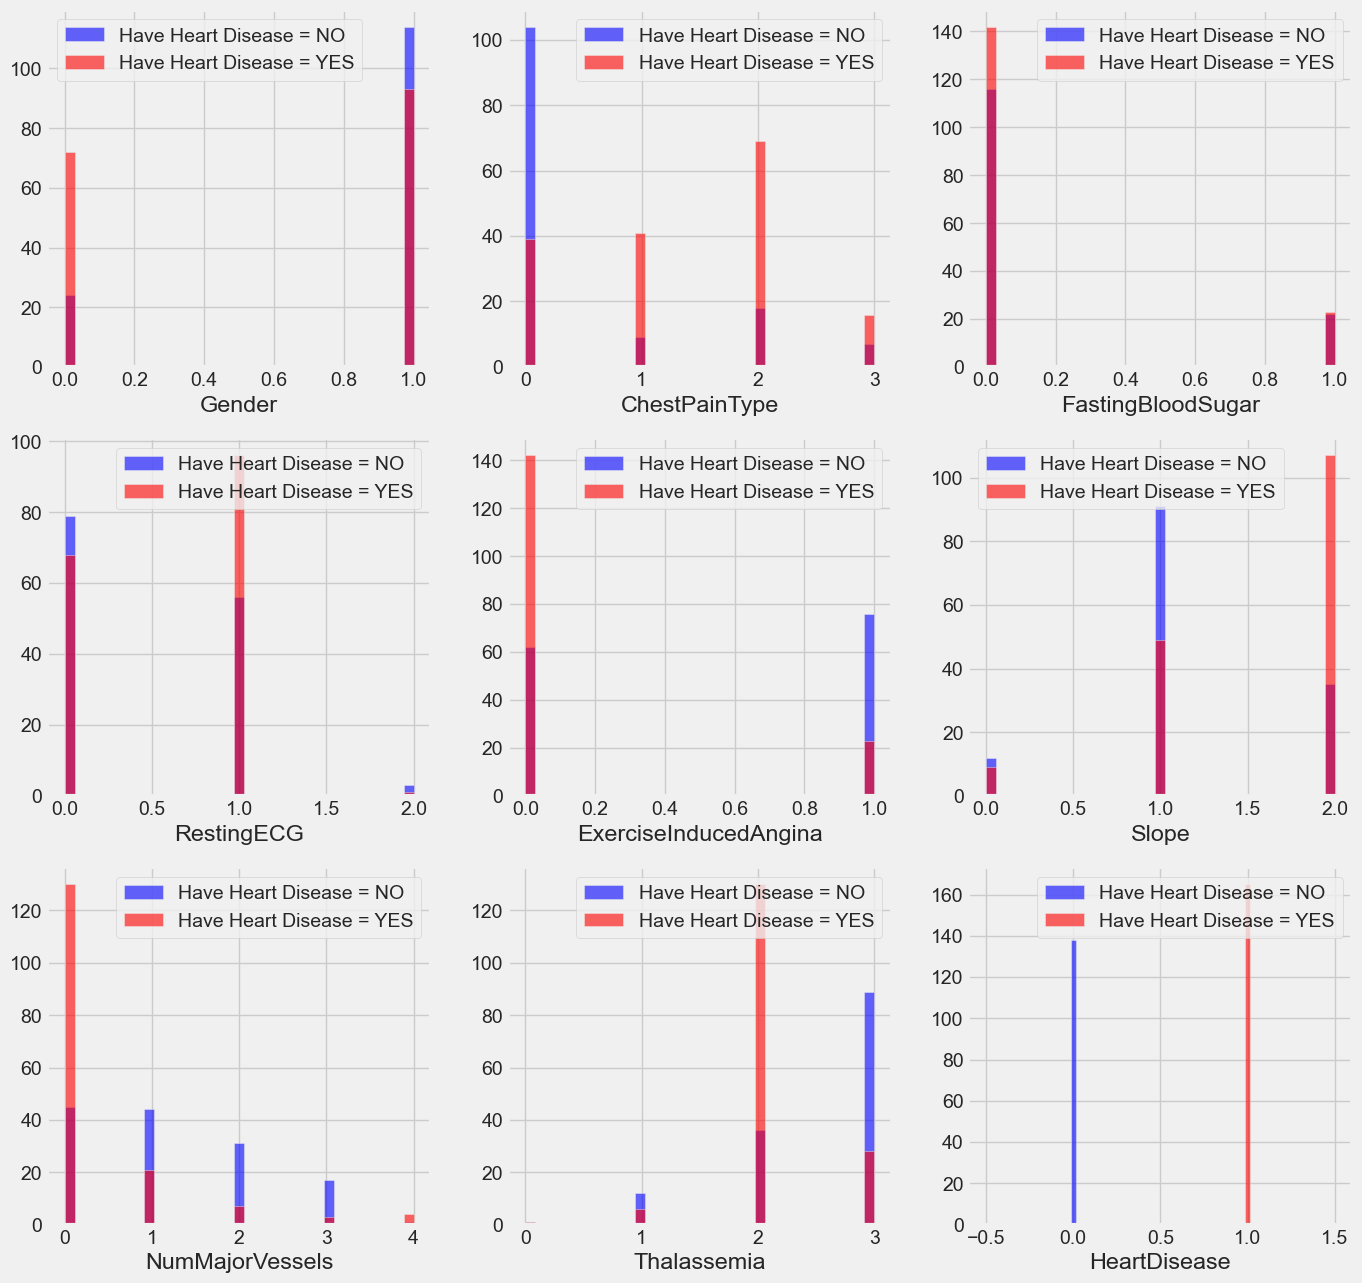

In [10]:
plt.figure(figsize=(15, 15))

num_cols = int(np.ceil(np.sqrt(len(categorical_val))))
num_rows = int(np.ceil(len(categorical_val) / num_cols))

# I can do it this way also using math library:
# num_cols = math.ceil(math.sqrt(len(categorical_val)))
# num_rows = math.ceil(len(categorical_val) / num_cols)

for i, column in enumerate(categorical_val, 1):   # assigns an index i to each column, starting from 1.
    plt.subplot(num_rows, num_cols, i)  # i indicates the index of the current subplot.
    df[df["HeartDisease"] == 0][column].hist(bins=35, color='blue', label='Have Heart Disease = NO', alpha=0.6)
    # creates a histogram for the current categorical column for rows where the "HeartDisease" column value is 0
    df[df["HeartDisease"] == 1][column].hist(bins=35, color='red', label='Have Heart Disease = YES', alpha=0.6)
    #creates a histogram for the current categorical column for rows where the "HeartDisease" column value is 1
    plt.legend()
    plt.xlabel(column)

- ChestPainType: People with cp 1, 2, 3 are more likely to develop heart disease than people with 0 cp.
- RestingECG: People with a value of 1 (reporting an abnormal heart rhythm, which can range from mild symptoms to severe problems) are more likely to develop heart disease.
- ExerciseInducedAngina: People with a value of 0 (no ==> doing sports angina) have more heart disease than people with a value of 1 (yes ==> exercise angina).
- Slope: People with a Downslopin value of 2 (Downslopins: signs of an unhealthy heart) are more likely to develop heart disease than people with a Downslopin value of 0 (Upslopins: best heart rate with exercise) or 1 (Flatsloping: lower heart rate). Minimal change (typical healthy heart).
- NumMajorVessels: The more blood moves the better, so people with a ca of 0 are more likely to develop heart disease.
- Thalassemia: People with a thal value of 2 are more likely to develop heart disease.

### A grid of histograms for continous columns vs HeartDisease

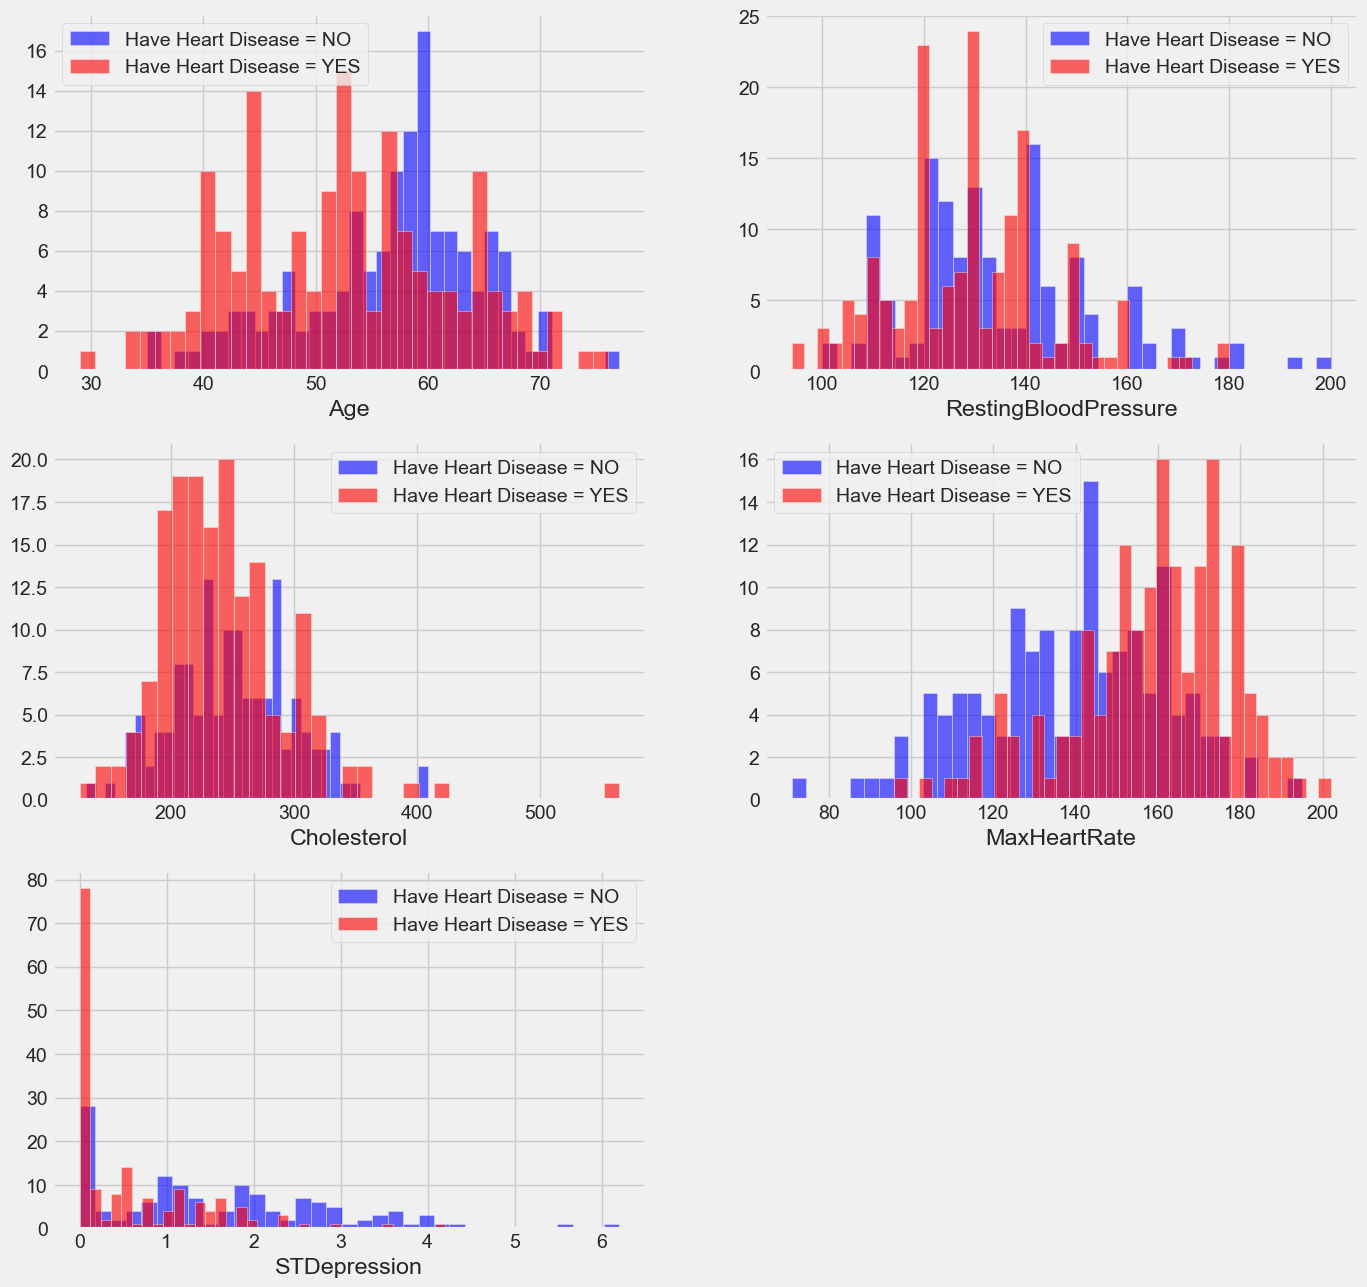

In [13]:
plt.figure(figsize=(15, 15))

num_cols = int(np.ceil(np.sqrt(len(continous_val))))
num_rows = int(np.ceil(len(continous_val) / num_cols))

for i, column in enumerate(continous_val, 1):
    plt.subplot(num_cols, num_rows, i)
    df[df["HeartDisease"] == 0][column].hist(bins=35, color='blue', label='Have Heart Disease = NO', alpha=0.6)
    df[df["HeartDisease"] == 1][column].hist(bins=35, color='red', label='Have Heart Disease = YES', alpha=0.6)
    plt.legend()
    plt.xlabel(column)

- RestingBloodPressure: Any value over 120-140 is generally concerning.
- Cholesterol: More than 200 is of concern.
- MaxHeartRate: People over the maximum heart rate of 140 are more likely to develop heart disease.
- STDepression: The exercise-induced depression versus rest stresses the heart. During exercise, an unhealthy heart will stress more.

### Visualizing a scatter plot of Heart Disease Risk Based on Age and Max Heart Rate

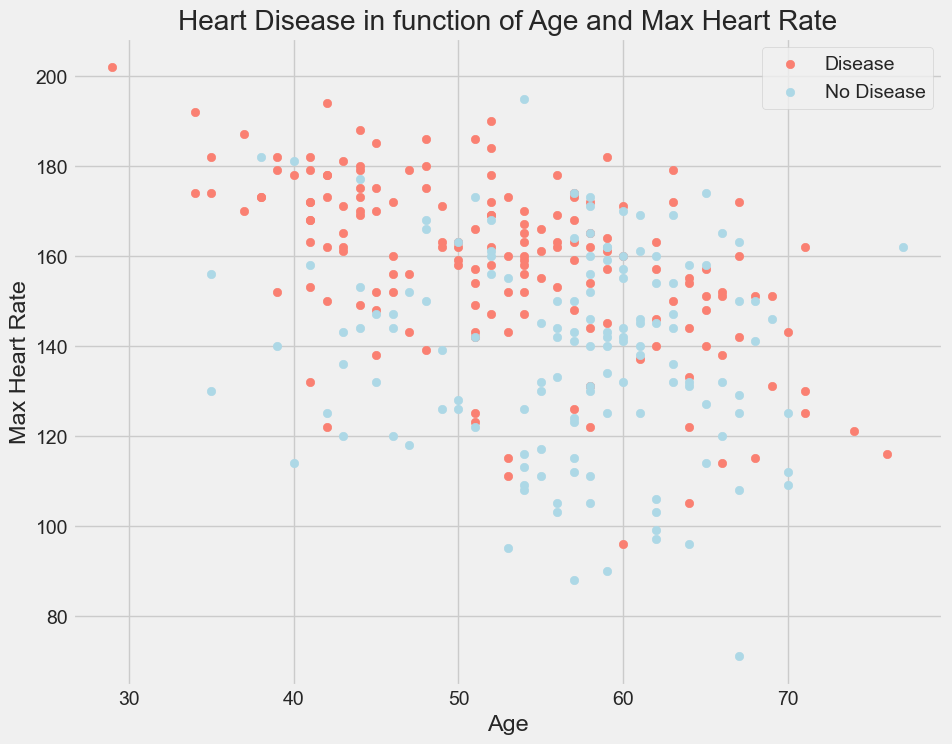

In [16]:
# Create another figure
plt.figure(figsize=(10, 8))

# Scatter with positive examples
plt.scatter(df['Age'][df['HeartDisease']==1], df['MaxHeartRate'][df['HeartDisease']==1], c="salmon")
# Scatter with negative examples
plt.scatter(df['Age'][df['HeartDisease']==0], df['MaxHeartRate'][df['HeartDisease']==0], c="lightblue")

plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease", "No Disease"])

### Correlation matrix heatmap
A correlation matrix heatmap helps visualize the relationships between numerical variables by representing the correlation coefficients between them.

(14.5, -0.5)

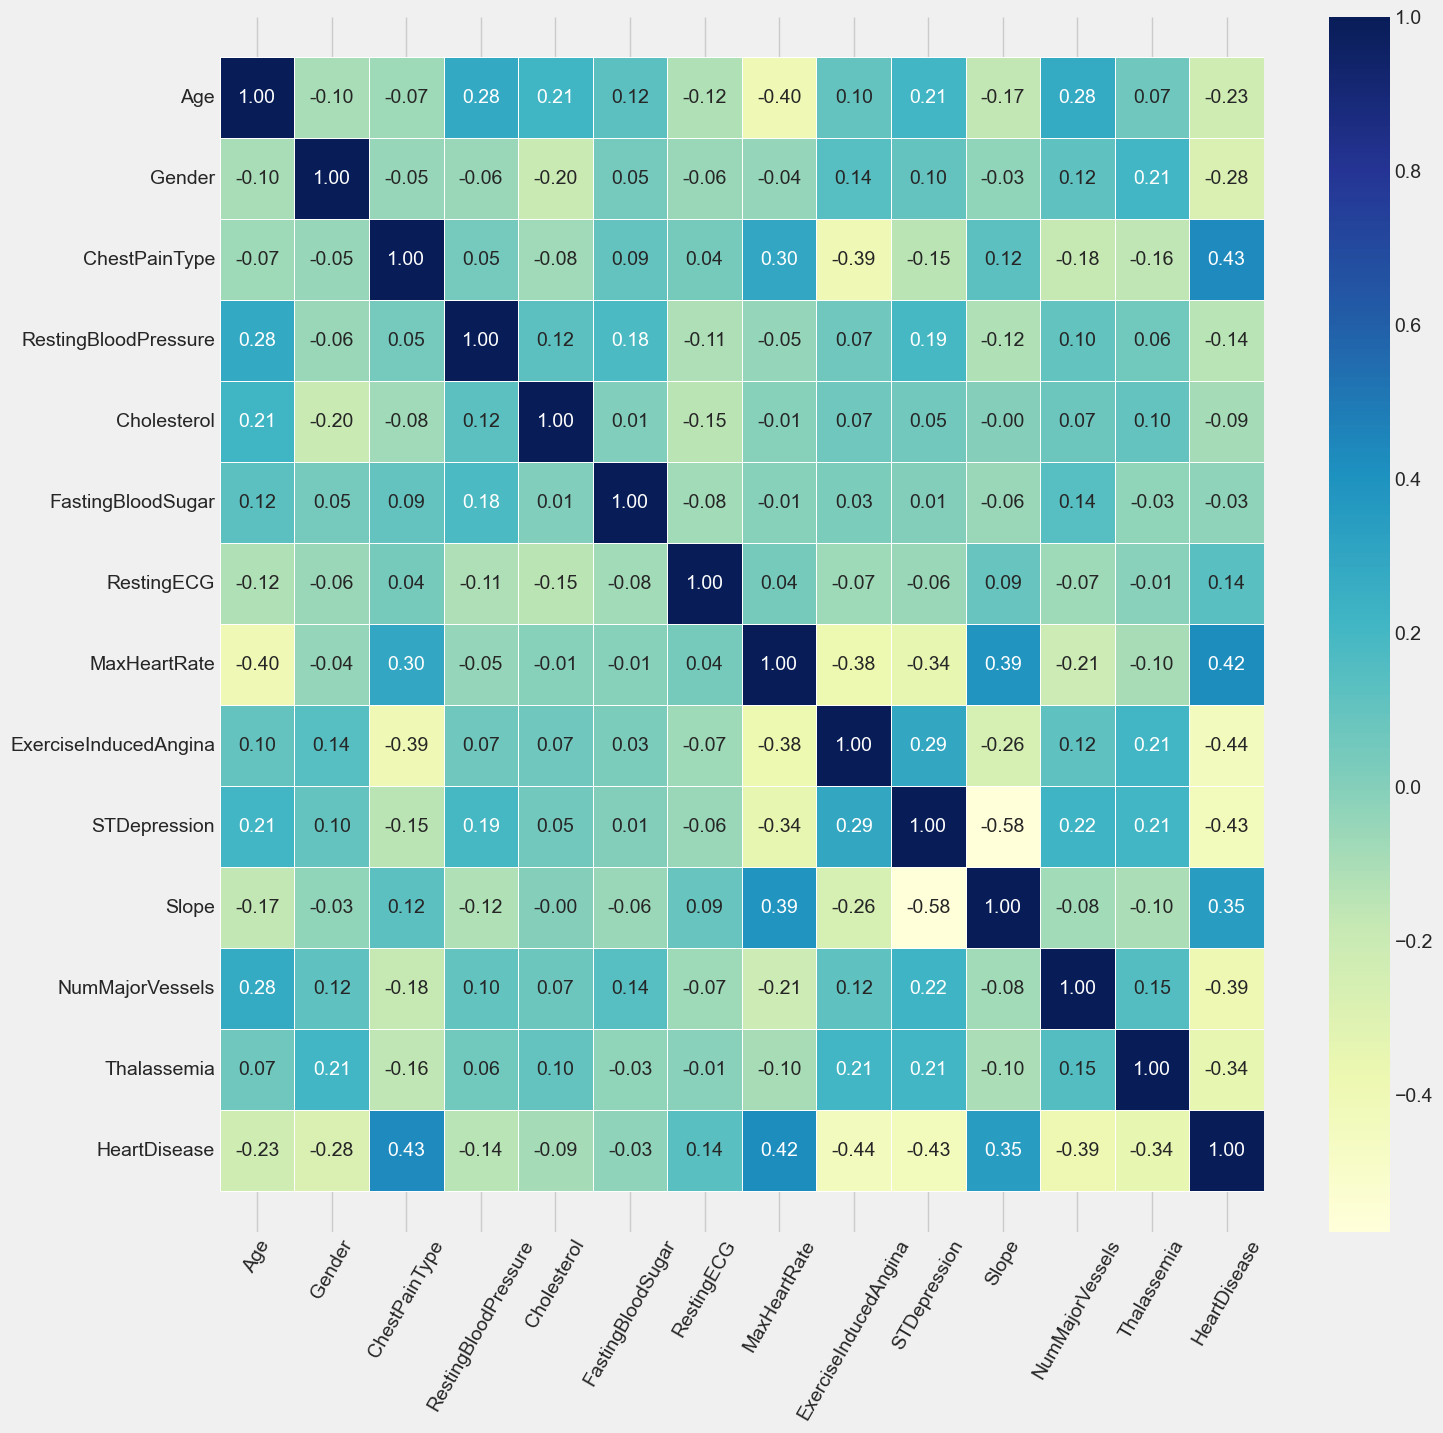

In [21]:
corr_matrix = df.corr()

fig, ax = plt.subplots(figsize=(15, 15))

ax = sns.heatmap(corr_matrix, annot=True, linewidths=0.5, fmt=".2f", cmap="YlGnBu")

plt.xticks(rotation=60)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

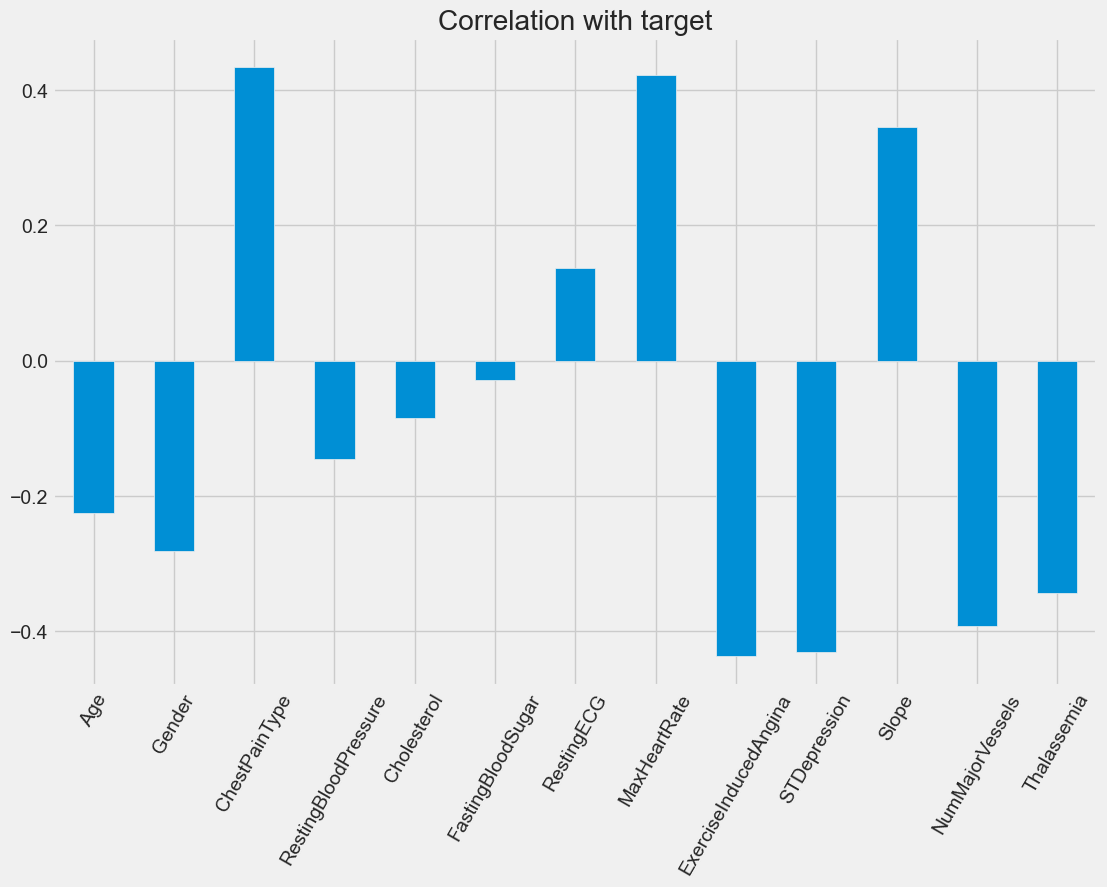

In [24]:
df.drop('HeartDisease', axis=1).corrwith(df['HeartDisease']).plot(kind='bar', grid=True, figsize=(12, 8), title="Correlation with target")
plt.xticks(rotation=60)
plt.show()

Cholesterol and FastingBloodSugar are the least correlated with the target variable.

### Data handling and Classification report

In [25]:
categorical_val.remove('HeartDisease')
dataset = pd.get_dummies(df, columns = categorical_val)

from sklearn.preprocessing import StandardScaler
s_sc = StandardScaler()
col_to_scale = ['Age', 'RestingBloodPressure', 'Cholesterol', 'MaxHeartRate', 'STDepression']
dataset[col_to_scale] = s_sc.fit_transform(dataset[col_to_scale])

In [26]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")

    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")

### Splitting and training the data using the logestic regression model

In [28]:
from sklearn.model_selection import train_test_split

X = dataset.drop('HeartDisease', axis=1)
y = dataset['HeartDisease']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='liblinear')
model.fit(X_train, y_train)

print_score(model, X_train, y_train, X_test, y_test, train=True)
print_score(model, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 86.79%
_______________________________________________
CLASSIFICATION REPORT:
              0      1  accuracy  macro avg  weighted avg
precision  0.88   0.86      0.87       0.87          0.87
recall     0.82   0.90      0.87       0.86          0.87
f1-score   0.85   0.88      0.87       0.87          0.87
support   97.00 115.00      0.87     212.00        212.00
_______________________________________________
Confusion Matrix: 
 [[ 80  17]
 [ 11 104]]

Test Result:
Accuracy Score: 86.81%
_______________________________________________
CLASSIFICATION REPORT:
              0     1  accuracy  macro avg  weighted avg
precision  0.87  0.87      0.87       0.87          0.87
recall     0.83  0.90      0.87       0.86          0.87
f1-score   0.85  0.88      0.87       0.87          0.87
support   41.00 50.00      0.87      91.00         91.00
_______________________________________________


In [30]:
test_score = accuracy_score(y_test, model.predict(X_test)) * 100
train_score = accuracy_score(y_train, model.predict(X_train)) * 100

results_df = pd.DataFrame(data=[["Logistic Regression", train_score, test_score]], columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,86.79,86.81
